Importing libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [11]:
df= pd.read_csv('mall.csv')
df=df.drop('CustomerID', axis=1)


In [12]:
df=pd.get_dummies(data=df, columns=['Genre'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


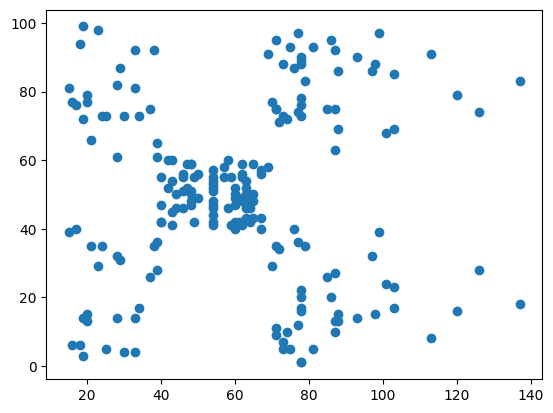

In [13]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])


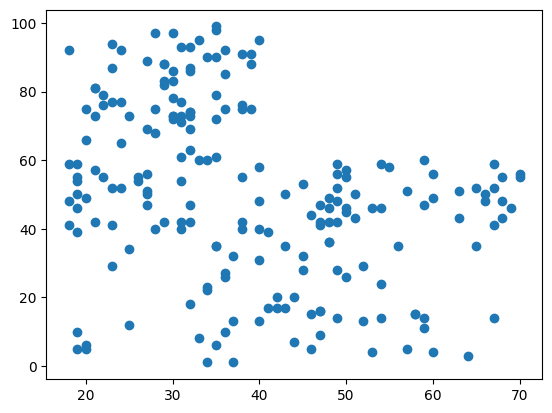

In [16]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])

Scaling 

In [6]:
scaler= StandardScaler()
df['Annual Income (k$)']= scaler.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)']= scaler.fit_transform(df[['Spending Score (1-100)']])
df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,-1.738999,-0.434801,False,True
1,21,-1.738999,1.195704,False,True
2,20,-1.700830,-1.715913,True,False
3,23,-1.700830,1.040418,True,False
4,31,-1.662660,-0.395980,True,False
...,...,...,...,...,...
195,35,2.268791,1.118061,True,False
196,45,2.497807,-0.861839,True,False
197,32,2.497807,0.923953,False,True
198,32,2.917671,-1.250054,False,True


Dimension reduction

In [7]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca,columns=['PC1','PC2'])
df_pca.head


<bound method NDFrame.head of            PC1       PC2
0   -19.830129 -1.716209
1   -17.869153 -1.657877
2   -18.804581 -1.828176
3   -15.870442 -1.730122
4    -7.838864 -1.729238
..         ...       ...
195  -3.879223  2.245758
196   6.164437  2.421267
197  -6.869649  2.570922
198  -6.818748  2.915430
199  -8.877698  2.998276

[200 rows x 2 columns]>

Elbow method

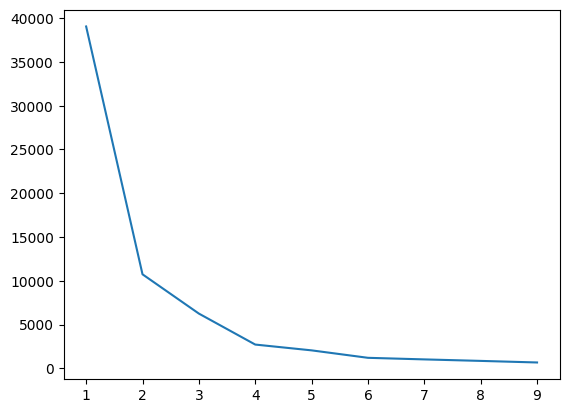

In [17]:
k_range= range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_pca)
    sse.append(km.inertia_)
plt.plot(k_range, sse)

K means

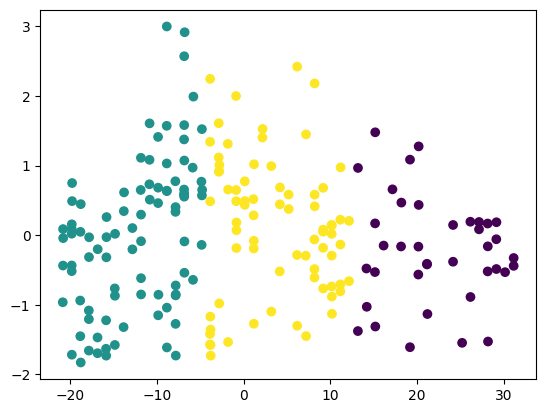

In [18]:
kfinal= KMeans(n_clusters=3)
y_2=kfinal.fit_predict(df_pca)
x=df_pca['PC1']
y=df_pca['PC2']
plt.scatter(x,y,c= y_2)